<a href="https://colab.research.google.com/github/Solo7602/MADPA/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Для числовых признаков


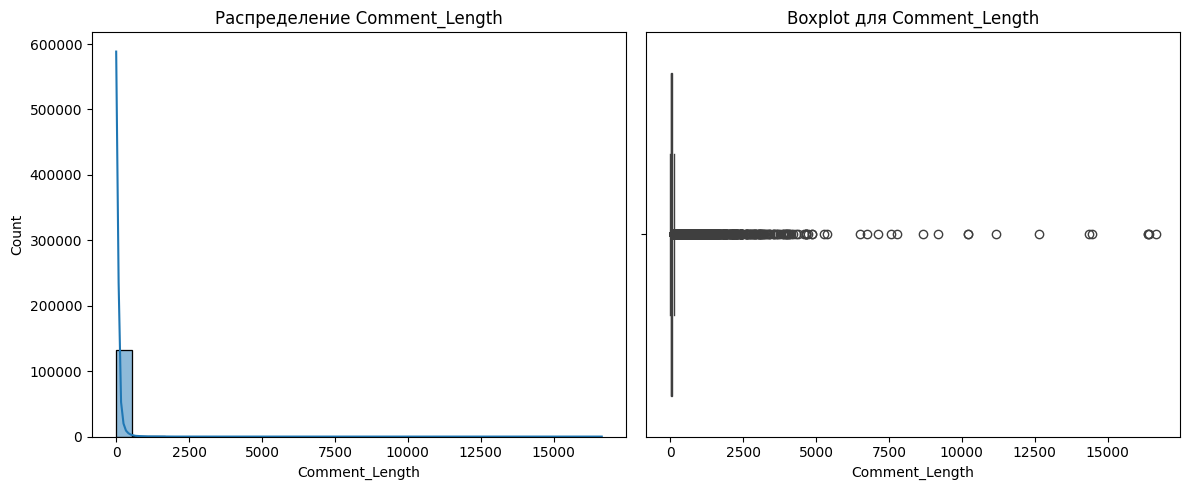


Для признака Comment_Length:
Асимметрия: 38.67
Распределение скошено вправо
Количество выбросов: 12221


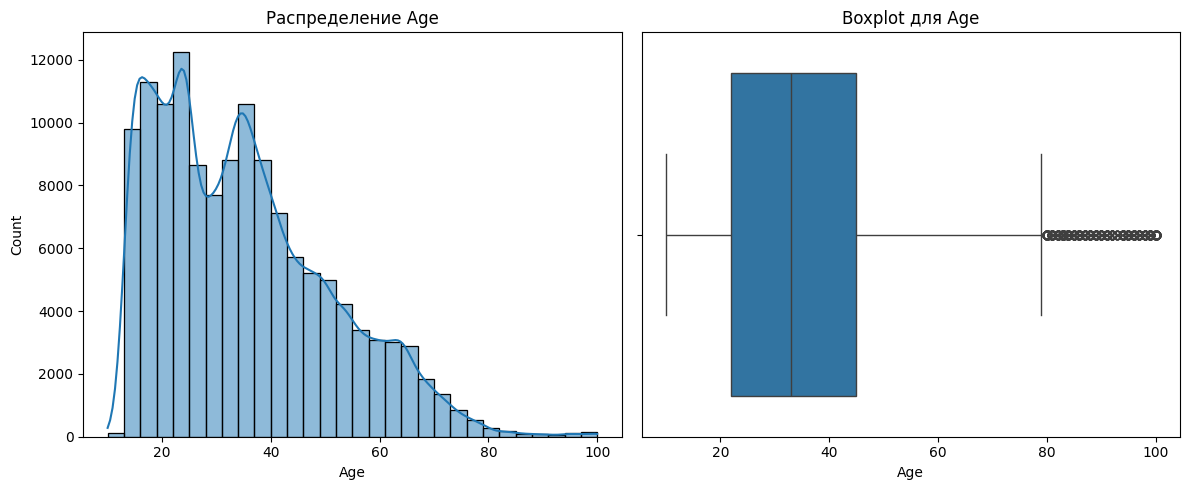


Для признака Age:
Асимметрия: 0.76
Распределение скошено вправо
Количество выбросов: 779
Для категориальных  признаков


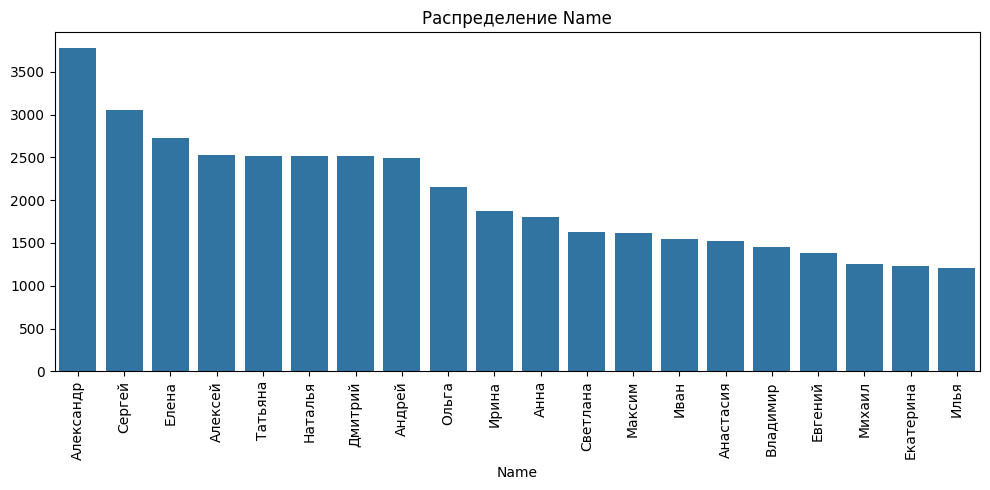


Для признака Name:
Количество уникальных значений: 12534
Топ-5 наиболее частых значений:
Name
Александр    3773
Сергей       3057
Елена        2732
Алексей      2531
Татьяна      2521
Name: count, dtype: int64


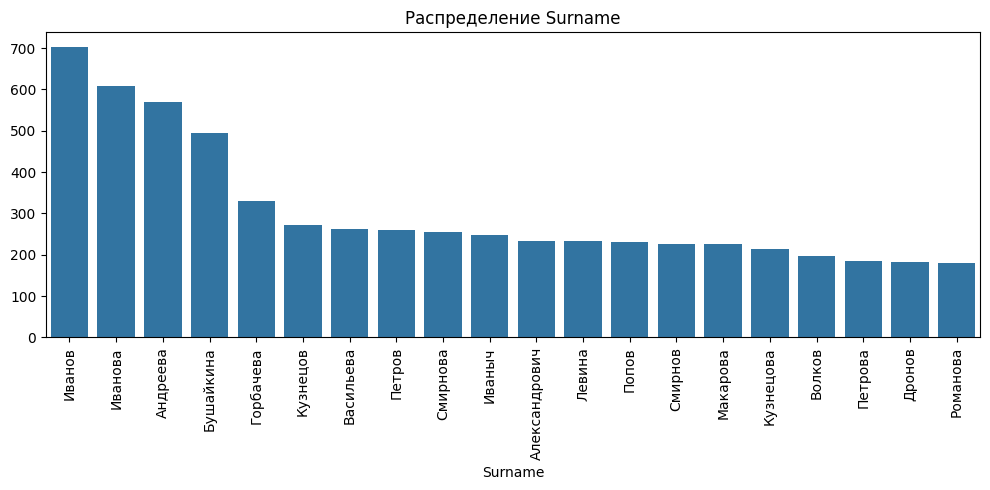


Для признака Surname:
Количество уникальных значений: 42363
Топ-5 наиболее частых значений:
Surname
Иванов       703
Иванова      608
Андреева     570
Бушайкина    494
Горбачева    330
Name: count, dtype: int64


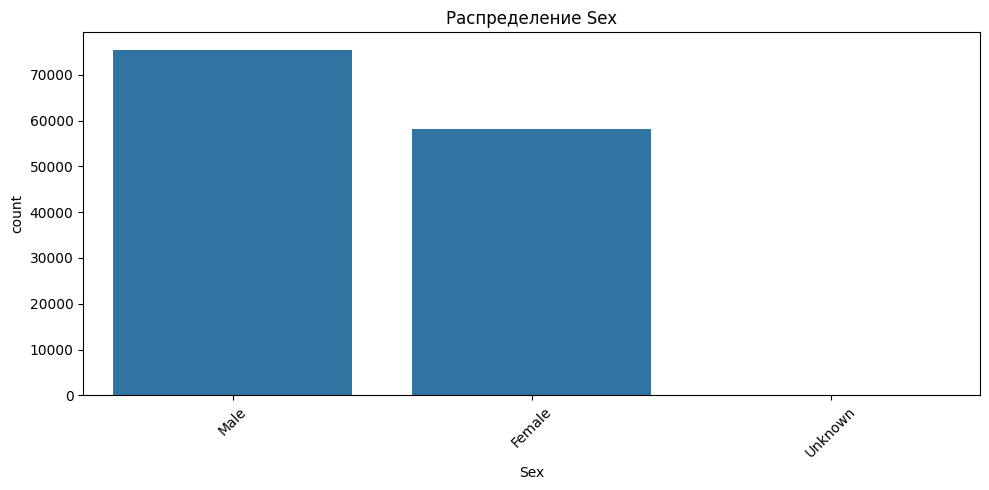


Для признака Sex:
Количество уникальных значений: 3
Топ-5 наиболее частых значений:
Sex
Male       75504
Female     58240
Unknown        9
Name: count, dtype: int64


<ipython-input-1-1e3cd92400c2>:65: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1-1e3cd92400c2>:65: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1-1e3cd92400c2>:65: UserWarning: Glyph 129782 (\N{HEART HANDS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1-1e3cd92400c2>:65: UserWarning: Glyph 127995 (\N{EMOJI MODIFIER FITZPATRICK TYPE-1-2}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1-1e3cd92400c2>:65: UserWarning: Glyph 127800 (\N{CHERRY BLOSSOM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1-1e3cd92400c2>:65: UserWarning: Glyph 128151 (\N{GROWING HEART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1-1e3cd92400c2>:65: UserWarning: Glyph 128588 (\N{PERSON RAISING BOTH HANDS IN CELEBRATION}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython

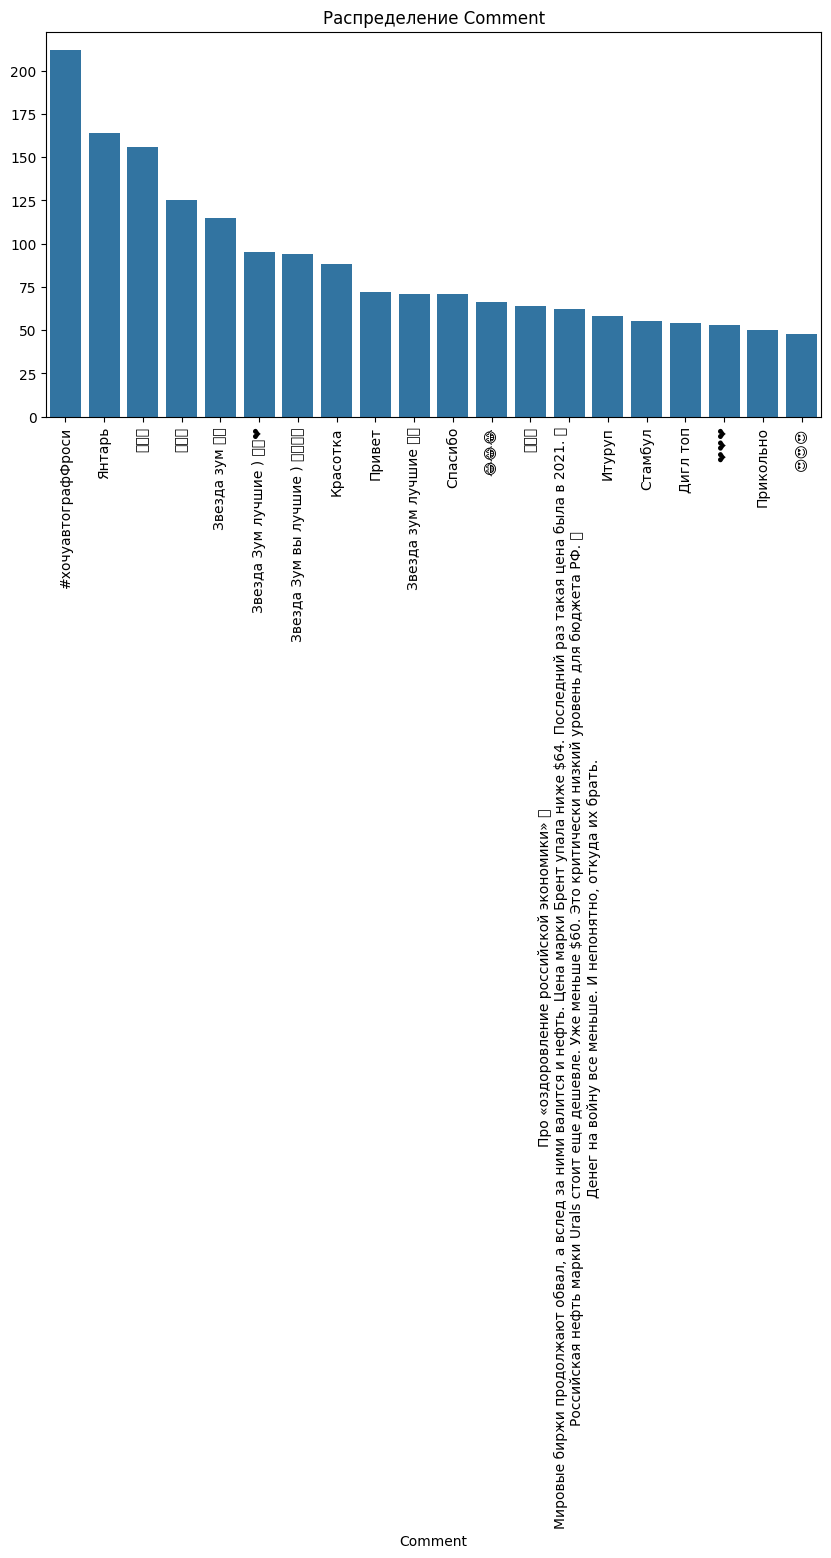


Для признака Comment:
Количество уникальных значений: 125114
Топ-5 наиболее частых значений:
Comment
#хочуавтографФроси    212
Янтарь                164
👍👍👍                   156
🔥🔥🔥                   125
Звезда зум 🫶🏻         115
Name: count, dtype: int64


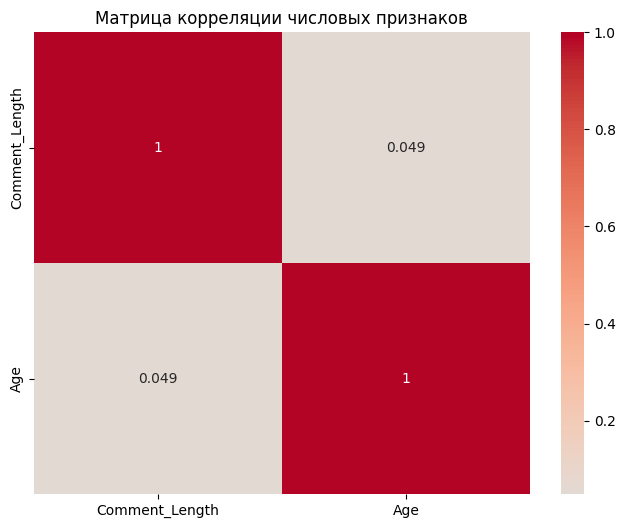

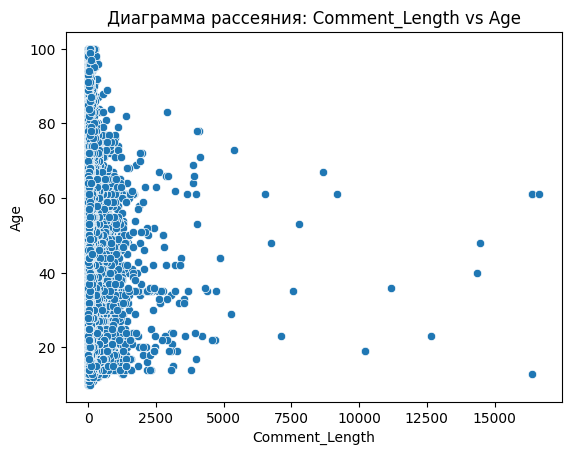

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_csv('sample_data/10k_dataset_processed_final.csv')

print('Для числовых признаков')
def calculate_length(comment):
    return len(comment)

df['Comment_Length'] = df.apply(lambda row: calculate_length(row['Comment']), axis=1)
# Анализ числовых признаков
numerical_cols = ['Comment_Length', 'Age']
for col in numerical_cols:
    plt.figure(figsize=(12, 5))

    # Гистограмма и график плотности
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Распределение {col}')

    # Ящик с усами
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot для {col}')

    plt.tight_layout()
    plt.show()

    # Оценка формы распределения
    skewness = df[col].skew()
    print(f"\nДля признака {col}:")
    print(f"Асимметрия: {skewness:.2f}")
    if abs(skewness) < 0.5:
        print("Распределение примерно симметричное (нормальное)")
    elif skewness > 0.5:
        print("Распределение скошено вправо")
    else:
        print("Распределение скошено влево")

    # Выбросы
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    outliers = df[(df[col] < q1 - 1.5*iqr) | (df[col] > q3 + 1.5*iqr)]
    print(f"Количество выбросов: {len(outliers)}")

print('Для категориальных  признаков')
categorical_cols = ['Name', 'Surname', 'Sex', 'Comment']
for col in categorical_cols:
    plt.figure(figsize=(10, 5))

    # Для признаков с большим количеством уникальных значений покажем топ-20
    if df[col].nunique() > 20:
        top_values = df[col].value_counts().head(20)
        sns.barplot(x=top_values.index, y=top_values.values)
        plt.xticks(rotation=90)
    else:
        sns.countplot(x=df[col])
        plt.xticks(rotation=45)

    plt.title(f'Распределение {col}')
    plt.tight_layout()
    plt.show()

    print(f"\nДля признака {col}:")
    print(f"Количество уникальных значений: {df[col].nunique()}")
    print("Топ-5 наиболее частых значений:")
    print(df[col].value_counts().head(5))

# Матрица корреляции (только для числовых признаков)
plt.figure(figsize=(8, 6))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляции числовых признаков')
plt.show()

# Диаграммы рассеяния для наиболее коррелированных пар
# В данном случае у нас только 2 числовых признака, поэтому строим их
sns.scatterplot(data=df, x='Comment_Length', y='Age')
plt.title('Диаграмма рассеяния: Comment_Length vs Age')
plt.show()